In [1]:
# importing important libraries to get started
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# commented out this line shows working directory
#print(os.getcwd())


# observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.
observations = pd.read_csv('/Users/jonathanmaat/data_science/NationalParkProj/observations.csv')

# preview of the first 5 rows of the newly created observation dataframe
print(observations.head())

# 3 features: scientific name, park name, and observations
print(observations.columns)

# data types are already set correctly 
print(observations.dtypes)

# 23296 rows in this data set each row is fully filled out
print(observations.info())

# 5541 unique animals coming from 4 different national parks
print(observations.describe(include='all'))

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
Index(['scientific_name', 'park_name', 'observations'], dtype='object')
scientific_name    object
park_name          object
observations        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
m

In [2]:
# species_info.csv - contains data about different species and their conservation status
species = pd.read_csv('/Users/jonathanmaat/data_science/NationalParkProj/species_info.csv')

print(species.head())
print(species.columns)
print(species.info())
print(species.dtypes)
print(species.describe(include='all'))

print(species.conservation_status.unique())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               ----

In [3]:
# create a histogram with total number of observations grouped by conservation status
# maynot provide anything of significance due to size dependencies of animals 
# for example seeing 5 bears --> not of concern, while 5 squirrels --> endangered

# first create a dataframe from observations that groups up scientific name and total number of observations
scientific_total_df = observations.groupby(['scientific_name']).sum().reset_index()
print(scientific_total_df.head())
print('Columns names for df1', scientific_total_df.columns)

# create a data frame from species with scientific name and conservation status
scientific_status_df = species[['scientific_name','conservation_status']]
print(scientific_status_df.head())
print(scientific_status_df.conservation_status.unique())
print('Columns names for df2', scientific_status_df.columns)

# lets see how many of the species we observed have a NaN value
scientific_status_df_dup = scientific_status_df.duplicated().value_counts()
print(scientific_status_df_dup)
print(scientific_status_df_dup[1]/(scientific_status_df_dup[1]+scientific_status_df_dup[0]))
print('There seems to be a little less than 5% of species that do not a have a conservation status value.')

# lets merge these two smaller dataframes using a left merge on the observations since 
# this is the data we interested in:
new_dataframe = pd.merge(scientific_total_df, scientific_status_df, how = 'left')
print(new_dataframe.head())

        scientific_name  observations
0         Abies bifolia           532
1        Abies concolor           630
2         Abies fraseri           518
3  Abietinella abietina           592
4     Abronia ammophila           523
Columns names for df1 Index(['scientific_name', 'observations'], dtype='object')
                 scientific_name conservation_status
0  Clethrionomys gapperi gapperi                 NaN
1                      Bos bison                 NaN
2                     Bos taurus                 NaN
3                     Ovis aries                 NaN
4                 Cervus elaphus                 NaN
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Columns names for df2 Index(['scientific_name', 'conservation_status'], dtype='object')
False    5543
True      281
dtype: int64
0.048248626373626376
There seems to be a little less than 5% of species that do not a have a conservation status value.
        scientific_name  observations conservation_status

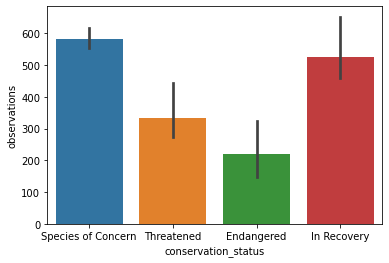

<Figure size 432x288 with 0 Axes>

In [4]:
#now let's create the histogram grouped by conservation status

#print(new_dataframe.conservation_status.unique())

sns.barplot(data= new_dataframe, x='conservation_status', y='observations')
plt.show()
plt.clf()



# this graph is not very useful


In [5]:
# lets try something different lets try and look at the most common animals at each park by observations

# trying to get a better understanding of what I would like to try and make
# make a graph for each park
# in descending order show the top 20 animals seen at each park

#print(observations.head())

# 4 parks in observations
parks = observations['park_name'].unique()
#print(parks)

# to make graphs easier to deal with going to create 4 dataframe to seperate parks
smoky = observations[observations['park_name']== 'Great Smoky Mountains National Park']

In [6]:
# now lets try to clean up smoky data frame to aggregate data by unique animals
print(smoky['scientific_name'].nunique())
print('This should be the length of the data frame otherwise there must be repeats or null values.')
print(len(smoky))
print('This means that there are:',5824-5541, "values that are either repeats or null.")

# first lets check if they are null values

# this checks if any of the scientific name are null
print(smoky.scientific_name.isnull().sum())


# now we check if any of the observation values are zero just in case since we could drop these
# to do this I will just call info and describe which probably could have just been called initially
smoky.info()
smoky.describe(include='all')
    
# since the min for observations is 10, there are no 0 observation rows in df

# info and describe also back the same findings in the beginning of this cell
# now we are ready to deal with the duplicates in the next cell

5541
This should be the length of the data frame otherwise there must be repeats or null values.
5824
This means that there are: 283 values that are either repeats or null.
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5824 entries, 0 to 23288
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  5824 non-null   object
 1   park_name        5824 non-null   object
 2   observations     5824 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 182.0+ KB


,scientific_name,park_name,observations
count,5824,5824,5824.000000
unique,5541,1,NaN
top,Puma concolor,Great Smoky Mountains National Park,NaN
freq,3,5824,NaN
mean,NaN,NaN,74.144918
std,NaN,NaN,20.315457
min,NaN,NaN,10.000000
25%,NaN,NaN,60.000000
50%,NaN,NaN,74.000000
75%,NaN,NaN,88.000000


In [7]:
# trying to aggregate by scientific name

# checking what column names are for accurate referencing
print(smoky.columns)

# using groupby to aggregate 
smoky_agg = smoky.groupby(smoky['scientific_name']).sum()


# checking if the change did what I expected
print(smoky_agg.describe(include='all'))
# looks like duplicate values were aggregated succesfully

# now we are going to create a smaller subset of the data by selecting the top 20 most observed animals
smoky_top20 = smoky_agg.sort_values(by='observations', ascending=False).head(20).reset_index()
print(smoky_top20)

# check that head really is creating a length 20 df
print(len(smoky_top20))



Index(['scientific_name', 'park_name', 'observations'], dtype='object')
       observations
count   5541.000000
mean      77.931781
std       26.703980
min       10.000000
25%       61.000000
50%       75.000000
75%       91.000000
max      256.000000
              scientific_name  observations
0       Streptopelia decaocto           256
1               Procyon lotor           247
2           Castor canadensis           243
3               Puma concolor           239
4         Fragaria virginiana           217
5              Holcus lanatus           216
6        Microtus longicaudus           212
7   Apocynum androsaemifolium           210
8         Polygonum aviculare           206
9                  Sus scrofa           205
10           Trifolium aureum           205
11            Setaria viridis           203
12                Lemna gibba           201
13           Anthus rubescens           201
14          Mimus polyglottos           200
15           Linaria vulgaris           200


In [8]:
# first I am going to remove the duplicates in species since it is giving a lot of problems later on
species = species.drop_duplicates(subset='scientific_name', keep='first')

# replace scientific_name with common names
smoky_top20 = pd.merge(smoky_top20, species, on='scientific_name', how='left')
print(smoky_top20)

smoky_top20 = smoky_top20.drop(['scientific_name', 'conservation_status'], axis=1)
print(smoky_top20)

smoky_top20.info()

              scientific_name  observations        category  \
0       Streptopelia decaocto           256            Bird   
1               Procyon lotor           247          Mammal   
2           Castor canadensis           243          Mammal   
3               Puma concolor           239          Mammal   
4         Fragaria virginiana           217  Vascular Plant   
5              Holcus lanatus           216  Vascular Plant   
6        Microtus longicaudus           212          Mammal   
7   Apocynum androsaemifolium           210  Vascular Plant   
8         Polygonum aviculare           206  Vascular Plant   
9                  Sus scrofa           205          Mammal   
10           Trifolium aureum           205  Vascular Plant   
11            Setaria viridis           203  Vascular Plant   
12                Lemna gibba           201  Vascular Plant   
13           Anthus rubescens           201            Bird   
14          Mimus polyglottos           200            

In [9]:
# check the datatypes are correct 
print(smoky_top20.info())


# while I would like to make x-axis an oridinal categorical variable it's easier to just leave as is
#smoky_top20['common_names'] = smoky_top20['common_names'].astype('category')

print(smoky_top20.dtypes)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   observations  20 non-null     int64 
 1   category      20 non-null     object
 2   common_names  20 non-null     object
dtypes: int64(1), object(2)
memory usage: 640.0+ bytes
None
observations     int64
category        object
common_names    object
dtype: object


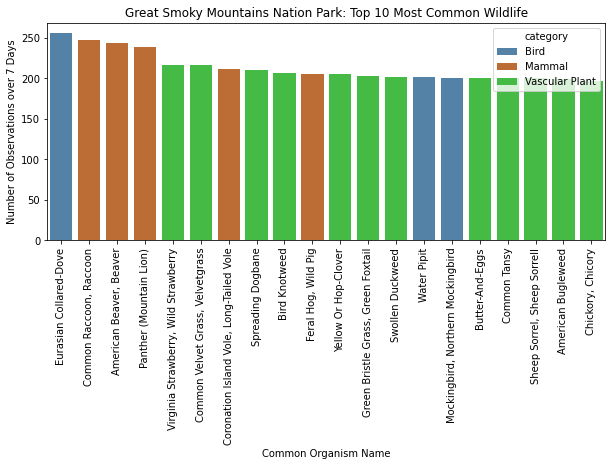

<Figure size 432x288 with 0 Axes>

In [10]:
# now we are finally ready to create a bar chart for the top 20 most likley animals to see given 
# observational data over 7 days at the park
plt.figure(figsize=(10,4))
colors= ["steelblue", "chocolate", "limegreen"]
sns.barplot(x='common_names', y='observations',data=smoky_top20, hue='category', palette=colors, dodge = False)
plt.xticks(rotation=90)
plt.xlabel('Common Organism Name')
plt.ylabel('Number of Observations over 7 Days')
plt.title('Great Smoky Mountains Nation Park: Top 10 Most Common Wildlife')

plt.show()
plt.clf() 


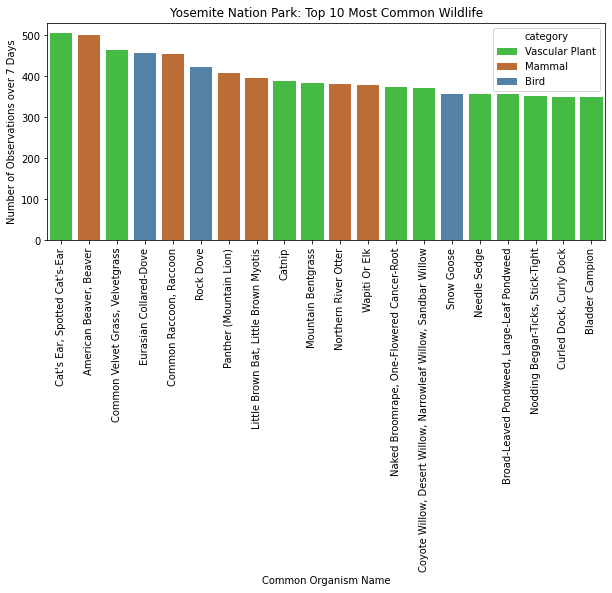

<Figure size 432x288 with 0 Axes>

In [11]:
# we proceed in similar fashion to create bar chart for the remaining 3 national parks
yosemite = observations[observations['park_name']== 'Yosemite National Park']
yosemite.describe(include='all')
yosemite_agg = yosemite.groupby(yosemite['scientific_name']).sum()
yosemite_top20 = yosemite_agg.sort_values(by='observations', ascending=False).head(20).reset_index()
yosemite_top20 = pd.merge(yosemite_top20, species, on='scientific_name', how='left')
yosemite_top20 = yosemite_top20.drop(['scientific_name', 'conservation_status'], axis=1)
colors = ["limegreen", "chocolate", "steelblue" ]
plt.figure(figsize=(10,4))
sns.barplot(x='common_names', y='observations',data=yosemite_top20, hue='category',palette=colors, dodge = False)
plt.xticks(rotation=90)
plt.xlabel('Common Organism Name')
plt.ylabel('Number of Observations over 7 Days')
plt.title('Yosemite Nation Park: Top 10 Most Common Wildlife')
plt.show()
plt.clf()



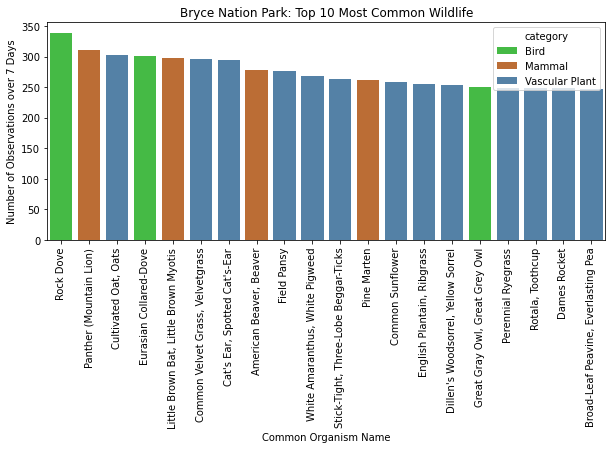

<Figure size 432x288 with 0 Axes>

In [12]:
# we proceed in similar fashion to create bar chart for the remaining 3 national parks
bryce = observations[observations['park_name']== 'Bryce National Park']
bryce.describe(include='all')
bryce_agg = bryce.groupby(bryce['scientific_name']).sum()
bryce_top20 = bryce_agg.sort_values(by='observations', ascending=False).head(20).reset_index()
bryce_top20 = pd.merge(bryce_top20, species, on='scientific_name', how='left')
bryce_top20 = bryce_top20.drop(['scientific_name', 'conservation_status'], axis=1)
colors = ["limegreen", "chocolate", "steelblue" ]
plt.figure(figsize=(10,4))
sns.barplot(x='common_names', y='observations',data=bryce_top20, hue='category',palette=colors, dodge = False)
plt.xticks(rotation=90)
plt.xlabel('Common Organism Name')
plt.ylabel('Number of Observations over 7 Days')
plt.title('Bryce Nation Park: Top 10 Most Common Wildlife')
plt.show()
plt.clf()



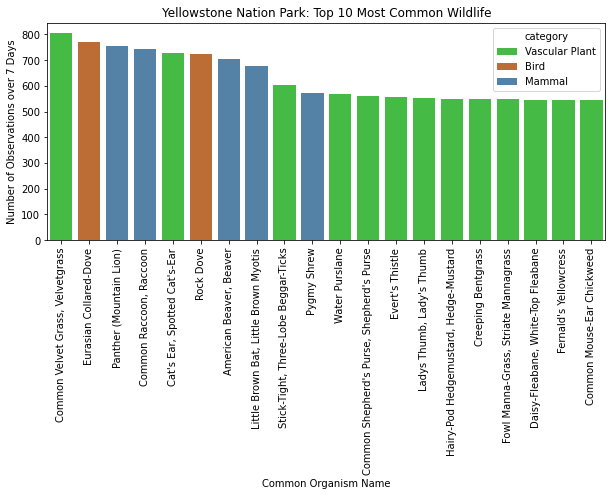

<Figure size 432x288 with 0 Axes>

In [13]:
# we proceed in similar fashion to create bar chart for the remaining 3 national parks
yellowstone = observations[observations['park_name']== 'Yellowstone National Park']
yellowstone.describe(include='all')
yellowstone_agg = yellowstone.groupby(yellowstone['scientific_name']).sum()
yellowstone_top20 = yellowstone_agg.sort_values(by='observations', ascending=False).head(20).reset_index()
yellowstone_top20 = pd.merge(yellowstone_top20, species, on='scientific_name', how='left')
yellowstone_top20 = yellowstone_top20.drop(['scientific_name', 'conservation_status'], axis=1)
colors = ["limegreen", "chocolate", "steelblue" ]
plt.figure(figsize=(10,4))
sns.barplot(x='common_names', y='observations',data=yellowstone_top20, hue='category',palette=colors, dodge = False)
plt.xticks(rotation=90)
plt.xlabel('Common Organism Name')
plt.ylabel('Number of Observations over 7 Days')
plt.title('Yellowstone Nation Park: Top 10 Most Common Wildlife')
plt.show()
plt.clf()



In [15]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5541, 4)
observations shape: (23296, 3)


In [17]:
species.groupby("category").size()

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64

In [19]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5363
conservation_status
Endangered             15
In Recovery             3
Species of Concern    151
Threatened              9
dtype: int64


In [21]:
# total observations
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739
